In [1]:
from __future__ import division
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from kde import weighted_gaussian_kde
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
import clustering.projected_correlation_functions as w
import clustering.randoms as rand
from clustering.utils import wp_d1d2,wp_dd

Read in Cosmology

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [4]:
## Read in LRG Data
LRG= Table.read('../cat/LRGzcat.fits')
LRGr=Table.read('../cat/LRGRandzcat.fits')

In [9]:
t=Table.read('../output/table_unionofallpeas.txt',format='ascii')


## Moving final Calculations to top of this sheet

In [5]:
# read in new Peas file (Using DR12 with fixed color selection all BPT types BUT seyfert, 641 objects, october 9th)
## 4/12/2018 trying with lots of interlopers + all peas potential
t=Table.read('../output/table_unionofallpeas.txt',format='ascii')

#t = Table.read('../output/table_DR12peas.txt',format='ascii')
#t = Table.read('../output/table_DR12colselnonSeyfert.txt',format='ascii')
peas=np.array(t)

#Add new array field of comoving distances needed for Corrfunc inputs
cdists = np.array([cosmo.comoving_distance(z).value for z in peas['z']])*cosmo.h
peas = append_fields(peas, 'cdist', cdists)

# append the field and make back into normal array
peas=np.array(peas)

In [12]:
pimax=60
#bins = np.array([.1,.5,1,3,6,8,10,20,40,60,100])
#bins = np.array([.1,.5,1,3,6,8,10,20,40,60,100])
#bins = np.array([1,3,6,8,10,15,20,30,40,50,60,100])

bins = np.array([1,4,8,16,32,40,50,60,100])

## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap 
## Note takes 4 days to run!!!!!!!!

#print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
### with errors? bootstrapped
#rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,cov_xcPboot,wp_arr_xcPboot = w.cross_wp(d1=peas, 
#d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')
#print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## Last run 10/13/2017, now want to give it a try with the new catalog + interlopers

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
### with errors? bootstrapped
rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,cov_xcPboot,wp_arr_xcPboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))




2018-04-12 16:05:39
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2018-04-12 16:30:07


In [13]:
#np.save('output/rp_xcPbootrgt1bg.npy', rp_xcPboot)
#np.save('output/wp_p_xcPbootrgt1bg',wp_p_xcPboot)
#np.save('output/wp_p_err_xcPbootrgt1bg', wp_p_err_xcPboot)
#np.save('output/cov_xcPbootrgt1bg',cov_xcPboot)
#np.save('output/wp_arr_xcPbootrgt1bg',wp_arr_xcPboot)

### for the unionof allpeas
np.save('output/shortrp_xcPboot_all.npy', rp_xcPboot)
np.save('output/shortwp_p_xcPboot_all',wp_p_xcPboot)
np.save('output/shortwp_p_err_xcPboot_all', wp_p_err_xcPboot)
np.save('output/shortcov_xcPboot_all',cov_xcPboot)
np.save('output/shortwp_arr_xcPboot_all',wp_arr_xcPboot)

## Use Merry's code to generate Random Peas Catalogs

In [8]:
# read in function from Merry's program
from clustering.randoms import genrand

In [9]:
# read in orignal Peas file
#t = Table.read('../output/table_DR12peas.txt',format='ascii')
t=Table.read('../output/table_unionofallpeas.txt',format='ascii')
peas=np.array(t)

#Add new array field of comoving distances needed for Corrfunc inputs
cdists = np.array([cosmo.comoving_distance(z).value for z in peas['z']])*cosmo.h
peas = append_fields(peas, 'cdist', cdists)

# append the field and make back into normal array
peas=np.array(peas)

In [10]:
#n=factor times more than peas to create a randoms catalog
n=500

number of randoms: 768500


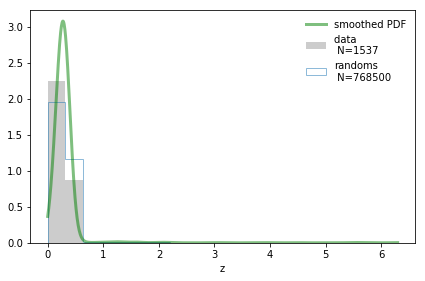

In [11]:
## No selection function for peas, so randomize only in redshift not position!!!! right now running w/ +/- 1deg pos
rzpea=genrand(peas,n,cosmo,width=.30,scoords='galactic',use_BASS_sens_map=False,plot=True,plot_filename=None)

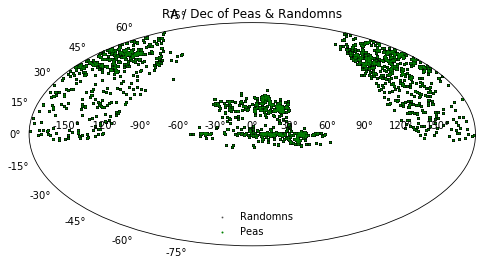

In [19]:
ra = coord.Angle(peas['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(peas['dec']*u.degree)

rar = coord.Angle(rzpea['ra']*u.degree)
rar = rar.wrap_at(180*u.degree)
decr = coord.Angle(rzpea['dec']*u.degree)

##subsample rar decr for plotting....
sm=len(rar)/10
sm=int(sm)

ind = np.random.randint(len(rar), size=sm)
rarsm=rar[ind]
decrsm=decr[ind]
## EDIT 6/30, let's keep it large for now to see what the result will be.
##Note - file needed be QUITE so large, what about making it smaller?
#sm=len(LRGr)/2
#if sm%2 == 1:
#    sm=sm+1
#sm=int(sm)
#ind = np.random.randint(len(LRGr), size=sm)
#LRGrsm=LRGr[ind]
#print(len(LRGr),len(LRGrsm))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")

ax.scatter(rar.radian,decr.radian,1,color='k',alpha=.5,label='Randomns')
ax.scatter(ra.radian, dec.radian,1,color='g',marker='o',label='Peas')

# blue is non-random default color used, black is randoms (k), reds r, cyan is c, green is g, points is transparent
# marker='o', '+', '*','.', 'x','square' or 's'	Square'diamond'or'd','^','v', '>', '<','pentagram' or 'p','hexagram' or 'h','none'
plt.legend(loc=8, frameon=False)
plt.title('RA / Dec of Peas & Randomns')

plt.savefig('../plots/PeaRand_ra_dec.pdf')

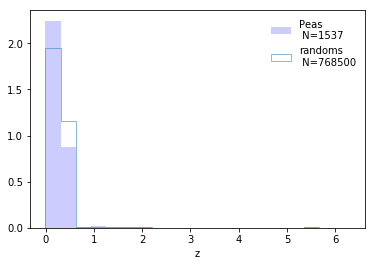

In [21]:
#plot z distributions
nd = len(peas)
nr = len(rzpea)
plt.hist(peas['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
         label='Peas \n N='+str(nd))
plt.hist(rzpea['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
         label='randoms\n N='+str(nr))
plt.xlabel('z')
plt.legend(loc='best', frameon=False)

#plt.savefig('../plots/zdist_PeasRandomns_wnoRADECvariations.pdf')

## Running Peas Autocorrelation

In [22]:
# set out to 60 Mpc length, as a function of r_p, each scale is integrated from 0 to 60 Mpc
pimax=60
#nbins = 10
#bins = np.logspace(-1, np.log10(40), nbins + 1)
#bins = np.array([0,2,4,10,20])
bins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])



In [23]:
##Randoms not randomized in RA/Dec
pimax=60
bins = np.array([.1,.5,1,3,6,8,10,20,40,60,100])
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

rp_Pboot,wp_p_Pboot,wp_p_err_Pboot,cov_Pboot,wp_arr_Pboot = w.auto_wp(peas, rzpea, bins, pimax, m=100, 
                                                                 estimator='P',errtype='b')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))


2018-04-12 15:28:02
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100


TypeError: 'NoneType' object is not iterable

In [17]:
np.save('output/rp_PpeaACF',rp_Pboot)
np.save('output/wp_p_PpeaACF',wp_p_Pboot,)
np.save('output/wp_p_err_PpeaACF',wp_p_err_Pboot)
np.save('output/cov_PpeaACF',cov_Pboot)
np.save('output/wp_arr_PpeaACF.npy', wp_arr_Pboot)

In [12]:
pimax=60
bins = np.array([.1,.5,1,3,6,8,10,20,40,60,100])

rp_Lboot,wp_p_Lboot,wp_p_err_Lboot,cov_Lboot,wp_arr_Lboot = w.auto_wp(peas, rzpea, bins, pimax, m=100, 
                                                                 estimator='L',errtype='b')


beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


In [16]:
np.save('output/rp_LpeaACF',rp_Lboot)
np.save('output/wp_p_LpeaACF',wp_p_Lboot,)
np.save('output/wp_p_err_LpeaACF',wp_p_err_Lboot)
np.save('output/cov_LpeaACF',cov_Lboot)
np.save('output/wp_arr_LpeaACF.npy', wp_arr_Lboot)

testing Jackknife vs. Bootstrap results

In [13]:
# computing errors to autocorrelation points (w_p) as a function of r_p
# errors are wrong ... 
#   jackknife code:  pieces of the sky are cut and kept only if objects in them
#   Boostrap code: sigma & covarance need to be edited....
## m = 5 number of bootstraps or jackniges
bins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])

rp_jack,wp_p_jack,wp_p_err_jack,cov_jack,wp_arr_jack = w.auto_wp(peas, rzpea, bins, pimax, m=5, 
                                                                 estimator='P',errtype='j')

beginning jackknifes
0 0 0 72.0 -90.0 -36.86989764584402
0 0 0 72.0 -36.86989764584402 -11.536959032815485
55 27021 0 72.0 -11.536959032815485 11.536959032815492
59 29779 0 72.0 11.536959032815492 36.86989764584403
0 0 0 72.0 36.86989764584403 90.0
0 0 72.0 144.0 -90.0 -36.86989764584402
0 0 72.0 144.0 -36.86989764584402 -11.536959032815485
15 7590 72.0 144.0 -11.536959032815485 11.536959032815492
34 17586 72.0 144.0 11.536959032815492 36.86989764584403
31 15435 72.0 144.0 36.86989764584403 90.0
0 0 144.0 216.0 -90.0 -36.86989764584402
0 0 144.0 216.0 -36.86989764584402 -11.536959032815485
29 14524 144.0 216.0 -11.536959032815485 11.536959032815492
62 30955 144.0 216.0 11.536959032815492 36.86989764584403
90 44950 144.0 216.0 36.86989764584403 90.0
0 0 216.0 288.0 -90.0 -36.86989764584402
0 0 216.0 288.0 -36.86989764584402 -11.536959032815485
19 9759 216.0 288.0 -11.536959032815485 11.536959032815492
24 10854 216.0 288.0 11.536959032815492 36.86989764584403
26 13057 216.0 288.0 36.8698

beginning Bootstrap
1 / 2
2 / 2


In [18]:
## Save the variables from the run
np.save('output/rp_jack',rp_jack)
np.save('output/wp_p_jack', wp_p_jack)
np.save('output/wp_p_err_jack',wp_p_err_jack)
np.save('output/cov_jack',cov_jack)
np.save('output/wp_arr_jack.npy', wp_arr_jack)


In [10]:
#Bootstrap errors version
rp_boot,wp_p_boot,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(peas, rzpea, bins, pimax, m=100, 
                                                                 estimator='P',errtype='b')


beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


In [21]:
#Bootstrap errors version
rp_Lboot,wp_p_Lboot,wp_p_err_Lboot,cov_Lboot,wp_arr_Lboot = w.auto_wp(peas, rzpea, bins, pimax, m=100, 
                                                                 estimator='L',errtype='b')


beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


In [22]:
np.save('output/rp_Lboot',rp_Lboot)
np.save('output/wp_p_Lboot', wp_p_Lboot)
np.save('output/wp_p_err_Lboot',wp_p_err_Lboot)
np.save('output/cov_Lboot',cov_boot)
np.save('output/wp_arr_Lboot.npy', wp_arr_Lboot)


In [11]:
print(rp_boot)
print(bins)

#Note from the dm simulation used: rpbins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60])

[  2.    4.5   7.    9.   12.5  17.5  25.   35.   45.   55. ]
[ 1  3  6  8 10 15 20 30 40 50 60]


In [37]:
pimax=60
bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
rp_boot,wp_p_boot,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(peas, rzpea, bins, pimax, m=100, 
                                                                 estimator='P',errtype='b')


beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


In [12]:
#np.save('output/rp_PeasACF_pi60.npy',rp_boot)
#np.save('output/wp_PeasACF_pi60.npy',wp_p_boot)
#np.save('output/wp_PeasACF_err_pi60.npy',wp_p_err_boot)

np.save('output/rp_boot',rp_boot)
np.save('output/wp_p_boot', wp_p_boot)
np.save('output/wp_p_err_boot',wp_p_err_boot)
np.save('output/cov_boot',cov_boot)
np.save('output/wp_arr_boot.npy', wp_arr_boot)

In [15]:
#print(wp_arr_jack)
print(wp_p_err_jack)
print(wp_p_err_boot)

[  3.19763226  11.1535809   18.85729655  14.28037094   0.           0.
  57.75063498  34.45049818   8.33894312   8.89802358]
[  0.00000000e+00   9.45163125e+00   2.53014153e+01   4.71078711e+01
   6.47930661e+01   4.53845522e+01   1.46221569e+04   5.07592306e+03
   2.10517604e+03   1.39851828e+03]


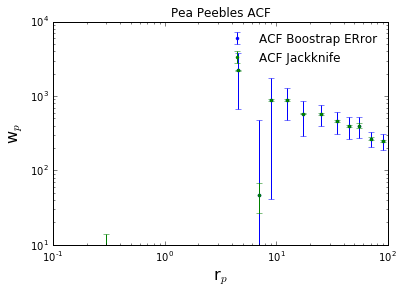

In [20]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_boot,wp_p_boot,yerr=wp_p_err_boot,fmt='.',color='b',label='ACF Boostrap ERror')
plt.errorbar(rp_jack,wp_p_jack,yerr=wp_p_err_jack,fmt='.',color='g',label='ACF Jackknife')
#plt.errorbar(rp_jack,wp_p_jack,yerr=wp_p_err_jack,fmt='.',color='g',label='ACF Jackknife')

#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p1_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=False,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Pea Peebles ACF')
#plt.savefig('../plots/corrfunctSFpeas.pdf')

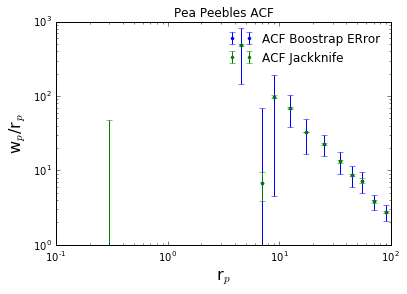

In [19]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_boot,wp_p_boot/rp_boot,yerr=wp_p_err_boot/rp_boot,fmt='.',color='b',label='ACF Boostrap ERror')
plt.errorbar(rp_jack,wp_p_jack/rp_jack,yerr=wp_p_err_jack/rp_jack,fmt='.',color='g',label='ACF Jackknife')
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p1_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/r$_{p}$',fontsize=16)
plt.title('Pea Peebles ACF')

#plt.savefig('../plots/corrfunctSFpeas.pdf')

## Read in LRGs -> Run Auto & Cross Correlations

In [7]:
## Read in LRG Data
LRG= Table.read('../cat/LRGzcat.fits')
LRGr=Table.read('../cat/LRGRandzcat.fits')

In [24]:
bins=
### LRG AUTOCORRELATION
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp,LRGwp_err,Mag = w.cross_wp(d1=peas, d2=LRG, r1=rzpea, r2=LRGr, bins=bins, pimax=pimax,m=5, estimator='L')
#LRGwp_p_noerrP = wp_dd(LRG, LRGr, bins, pimax, estimator='P')
#LRGwp_p_noerrL = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp_p,LRGwp_err,cov = w.auto_wp(LRG, LRGr, bins, pimax, m=5, estimator='P')
rp_LRGjack,wp_p_LRGjack,wp_p_err_LRGjack,cov_LRGjack,wp_arr_LRGjack = w.auto_wp(LRG, LRGr, bins, pimax, m=5, 
                                                                 estimator='P',errtype='j')
rp_LRGboot,wp_p_LRGboot,wp_p_err_LRGboot,cov_LRGboot,wp_arr_LRGboot = w.auto_wp(LRG, LRGr, bins, pimax, m=100, 
                                                                 estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-07-25 18:49:58
beginning jackknifes
0 0 0 72.0 -90.0 -36.86989764584402
0 0 0 72.0 -36.86989764584402 -11.536959032815485
27763 1346063 0 72.0 -11.536959032815485 11.536959032815492
21931 1063797 0 72.0 11.536959032815492 36.86989764584403
0 0 0 72.0 36.86989764584403 90.0
0 0 72.0 144.0 -90.0 -36.86989764584402
0 0 72.0 144.0 -36.86989764584402 -11.536959032815485
6764 329858 72.0 144.0 -11.536959032815485 11.536959032815492
18459 940242 72.0 144.0 11.536959032815492 36.86989764584403
8661 395655 72.0 144.0 36.86989764584403 90.0
0 0 144.0 216.0 -90.0 -36.86989764584402
0 0 144.0 216.0 -36.86989764584402 -11.536959032815485
24106 1219508 144.0 216.0 -11.536959032815485 11.536959032815492
47262 2357107 144.0 216.0 11.536959032815492 36.86989764584403
39622 1946246 144.0 216.0 36.86989764584403 90.0
0 0 216.0 288.0 -90.0 -36.86989764584402
0 0 216.0 288.0 -36.86989764584402 -11.536959032815485
11451 544015 216.0 288.0 -11.536959032815485 11.536959032815492
22399 1075039 216.0 288.0

Save outputfrom autocorrelation of LRGs

In [18]:
#np.save('output/wp_arr_LRGboot.npy', wp_arr_LRGboot)
#np.save('output/rp_LRGboot',rp_LRGboot)
#np.save('output/wp_p_LRGboot', wp_p_LRGboot)
#np.save('output/wp_p_err_LRGboot',wp_p_err_LRGboot)
#np.save('output/cov_LRGboot',cov_LRGboot)

In [37]:
#np.save('rp_LRGjack', rp_LRGjack)
#np.save('wp_p_LRGjack',wp_p_LRGjack)
#np.save('wp_p_err_LRGjack', wp_p_err_LRGjack)
#np.save('cov_LRGjack',cov_LRGjack)
#np.save('wp_arr_LRGjack',wp_arr_LRGjack)

Read in LRG Autocorrelation data for futher analysis

In [7]:
## ACF LRGs
rp_LRGboot=np.load('output/rp_LRGboot.npy')
wp_p_LRGboot=np.load('output/wp_p_LRGboot.npy')
wp_p_err_LRGboot=np.load('output/wp_p_err_LRGboot.npy')
cov_LRGboot=np.load('output/cov_LRGboot.npy')
wp_arr_LRGboot=np.load('output/wp_arr_LRGboot.npy')

rp_LRGjack=np.load('output/rp_LRGjack.npy')
wp_p_LRGjack=np.load('output/wp_p_LRGjack.npy')
wp_p_err_LRGjack=np.load('output/wp_p_err_LRGjack.npy')
cov_LRGjack=np.load('output/cov_LRGjack.npy')
wp_arr_LRGjack=np.load('output/wp_arr_LRGjack.npy')

## ACF Peas
rp_boot=np.load('output/rp_boot.npy')
wp_p_boot=np.load('output/wp_p_boot.npy')
wp_p_err_boot=np.load('output/wp_p_err_boot.npy')
cov_boot=np.load('output/cov_boot.npy')
wp_arr_boot=np.load('output/wp_arr_boot.npy')

rp_jack=np.load('output/rp_jack.npy')
wp_p_jack=np.load('output/wp_p_jack.npy')
wp_p_err_jack=np.load('output/wp_p_err_jack.npy')
cov_jack=np.load('output/cov_jack.npy')
wp_arr_jack=np.load('output/wp_arr_jack.npy')

In [32]:
wp_p_boot


array([  0.00000000e+00,  -2.00000000e+00,  -1.00000000e+01,
        -3.60000000e+01,  -8.40000000e+01,  -1.16000000e+02,
         2.05639955e+03,   8.45411863e+02,   5.32263021e+02,
         5.20937314e+02])

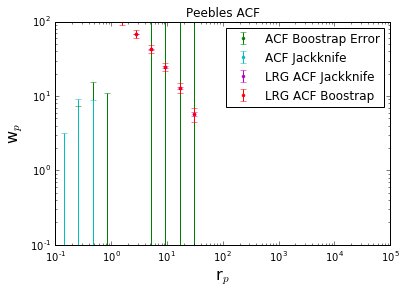

In [8]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_boot,wp_p_boot,yerr=wp_p_err_boot,fmt='.',color='g',label='ACF Boostrap Error')
plt.errorbar(rp_jack,wp_p_jack,yerr=wp_p_err_jack,fmt='.',color='c',label='ACF Jackknife')
plt.errorbar(rp_LRGjack,wp_p_LRGjack,yerr=wp_p_err_LRGjack,fmt='.',color='m',label='LRG ACF Jackknife')
plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.axis([.1,100000,.1,100])
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Peebles ACF')
#plt.savefig('../plots/corrfunctSFpeas.pdf')

## Cross Correlation

In [15]:
## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
rp_xc_Pboot,wp_xc_Pboot,wp_xc_err_Pboot,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas, 
d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-17 12:51:09
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-08-17 13:07:24


In [16]:
#np.save('output/rp_xc_Pboot.npy', rp_xc_Pboot)
#np.save('output/wp_xc_Pboot',wp_xc_Pboot)
#np.save('output/wp_xc_err_Pboot', wp_xc_err_Pboot)
#np.save('output/cov_xc_Pboot',cov_xc_Pboot)
#np.save('output/wp_arr_xc_Pboot',wp_arr_xc_Pboot)

In [13]:
## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
rp_xc_Pjack,wp_xc_Pjack,wp_xc_err_Pjack,cov_xc_Pjack,wp_arr_xc_Pjack = w.cross_wp(d1=peas, 
d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=5, estimator='P',errtype='j')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-17 12:34:19
beginning jackknifes
0 0 0 72.0 -90.0 -36.86989764584402
0 0 0 72.0 -36.86989764584402 -11.536959032815485
55 26893 0 72.0 -11.536959032815485 11.536959032815492
59 29728 0 72.0 11.536959032815492 36.86989764584403
0 0 0 72.0 36.86989764584403 90.0
0 0 72.0 144.0 -90.0 -36.86989764584402
0 0 72.0 144.0 -36.86989764584402 -11.536959032815485
15 7617 72.0 144.0 -11.536959032815485 11.536959032815492
34 17296 72.0 144.0 11.536959032815492 36.86989764584403
31 15562 72.0 144.0 36.86989764584403 90.0
0 0 144.0 216.0 -90.0 -36.86989764584402
0 0 144.0 216.0 -36.86989764584402 -11.536959032815485
29 14178 144.0 216.0 -11.536959032815485 11.536959032815492
62 30943 144.0 216.0 11.536959032815492 36.86989764584403
90 44870 144.0 216.0 36.86989764584403 90.0
0 0 216.0 288.0 -90.0 -36.86989764584402
0 0 216.0 288.0 -36.86989764584402 -11.536959032815485
19 9800 216.0 288.0 -11.536959032815485 11.536959032815492
24 11066 216.0 288.0 11.536959032815492 36.86989764584403
26 13462

In [14]:
#np.save('output/rp_xc_Pjack.npy', rp_xc_Pjack)
#np.save('output/wp_xc_Pjack',wp_xc_Pjack)
#np.save('output/wp_xc_err_Pjack', wp_xc_err_Pjack)
#np.save('output/cov_xc_Pjack',cov_xc_Pjack)
#np.save('output/wp_arr_xc_Pjack',wp_arr_xc_Pjack)

Read in Cross-Correlation Functions for plotting & Analysis

In [10]:
rp_xc_Pboot=np.load('output/rp_xc_Pboot.npy')
wp_xc_Pboot=np.load('output/wp_xc_Pboot.npy')
wp_xc_err_Pboot=np.load('output/wp_xc_err_Pboot.npy')
cov_xc_Pboot=np.load('output/cov_xc_Pboot.npy')
wp_arr_xc_Pboot=np.load('output/wp_arr_xc_Pboot.npy')

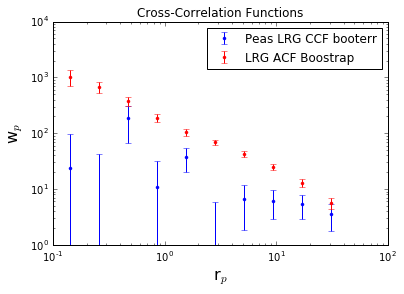

In [11]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_xc_Pboot,wp_xc_Pboot,yerr=wp_xc_err_Pboot,fmt='.',color='b',label='Peas LRG CCF booterr')
plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions')

#plt.savefig('../plots/corrfunctLRGPEAauto.pdf')

In [13]:
wp_xc

array([ 228.91584894,  -66.04176339,  270.4196983 ,   18.88939222,
         79.34302892,   -1.7268732 ,   17.07587339,   15.54189095,
         14.43427524,   10.99080618])

In [14]:
wp_xc_err

array([  1.29916463e+05,   8.99791431e+03,   2.14477222e+04,
         2.22371430e+03,   1.07979849e+03,   1.08930522e+02,
         1.00220949e+02,   5.87169276e+01,   2.03890286e+01,
         1.10616403e+01])

In [15]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp,LRGwp_err,Mag = w.cross_wp(d1=peas, d2=LRG, r1=rzpea, r2=LRGr, bins=bins, pimax=pimax,m=5, estimator='L')
LRGwp_p_noerrP = wp_dd(LRG, LRGr, bins, pimax, estimator='P')
LRGwp_p_noerrL = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp_p,LRGwp_err,cov = w.auto_wp(LRG, LRGr, bins, pimax, m=5, estimator='L')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-07-17 19:06:55
2017-07-17 20:30:27


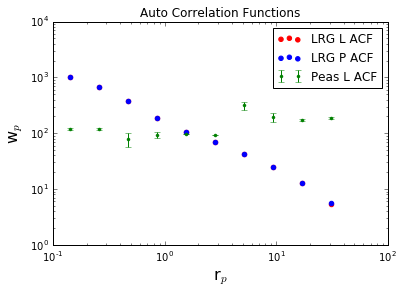

In [19]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rpP,wp_pL,yerr=wp_p_errP,fmt='.',color='g',label='Peas L ACF')
plt.scatter(rpP,LRGwp_p_noerrL,color='r',label='LRG L ACF')
plt.scatter(rpP,LRGwp_p_noerrP,color='b',label='LRG P ACF')
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p15_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=True)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Auto Correlation Functions')

#plt.savefig('../plots/corrfunctLRGPEAauto.pdf')

In [20]:
print(LRGwp_p_noerrL)

[ 1026.17777937   681.95715804   379.20917454   188.58986124   104.93445936
    68.33945071    42.54954507    24.3757939     12.65178423     5.42466491]


In [21]:
print(LRGwp_p_noerrP)

[ 1021.75044755   674.61514331   379.25453248   189.04117831   105.14235834
    68.5413169     42.75752957    24.61101803    12.91682928     5.7215873 ]


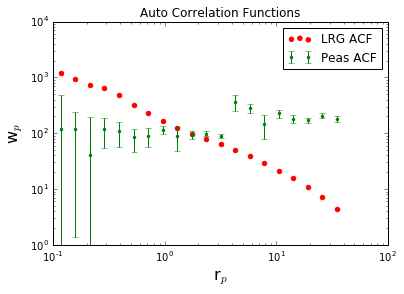

In [14]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp,wp_p5,yerr=wp_p5_err,fmt='.',color='g',label='Peas ACF')
plt.scatter(rp,LRGwp_p_noerr,color='r',label='LRG ACF')
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p15_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=True)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Auto Correlation Functions')

plt.savefig('../plots/corrfunctLRGPEAauto.pdf')

In [12]:
## Run a clustering cross correlation b/w the peas & LRGs w/ no jacknif errors
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#wpx=wp_d1d2(d1=peas,d2=LRG,r2=LRGr, bins=bins, pimax=pimax, r1=rzpea, estimator='L')
## with errors? these are wrong, helpix divides sky into projection of equal area pixels, bin sample 
#m is # jaclknife,try40 (NOTE 40 min to run
rp,wp_xc,wp_xc_err,Mag,arr = w.cross_wp(d1=peas, d2=LRG, r1=rzpea, r2=LRGr, bins=bins, pimax=pimax,m=1, estimator='L')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-04 23:21:22
beginning Bootstrap
1 / 1


ZeroDivisionError: division by zero

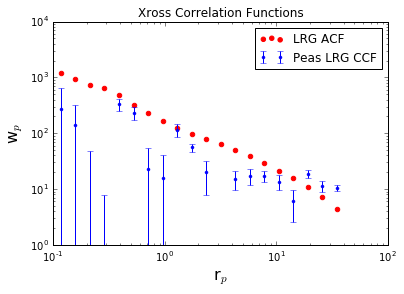

In [17]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp,wp_xc,yerr=wp_xc_err,fmt='.',color='b',label='Peas LRG CCF')
#plt.scatter(rp,LRGwp_p_noerr,color='r',label='LRG ACF')
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p15_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=True)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Xross Correlation Functions')

plt.savefig('../plots/corrfunctLRGPEAxc.pdf')

In [21]:
print(rp)
print(wp_xc)
print(wp_xc_err)
print(wp_p5)
print(wp_p5_err)
print(LRGwp_p_noerr)

[  0.11746414   0.15849235   0.21385101   0.2885455    0.3893295
   0.52531561   0.70879935   0.9563708    1.29041472   1.74113445
   2.34928285   3.16984705   4.27702026   5.77091007   7.78658997
  10.50631229  14.17598697  19.12741606  25.80829442  34.82268898]
[ 273.52605337  138.73667779  -54.72262972  -50.90923854  332.76770226
  232.56018774   22.74569733   16.05739366  114.78986964   55.83249754
   19.99626378  -14.05471763   15.16485483   17.2881482    17.35892515
   13.63535585    6.0488016    18.79585246   11.37834032   10.58395133]
[ 361.25087182  182.80061686  102.91450969   58.69807986   85.74543051
   59.70128756   31.20053125   24.7348678    30.49174745    9.47324108
   12.15385907    9.15595181    5.52039993    5.37319382    4.13396118
    4.14723895    3.43327515    2.83316352    2.3608597     1.2644318 ]
[ 120.          120.           40.12322138  120.          107.65437254
   84.05595446   89.52201479  115.87962039   88.05849033   94.3129522
   98.44260228   90.11760

NameError: name 'table' is not defined

In [25]:
t=np.array()
t.add_column(t.Column(name='rp', data=rp))

#Add new array field of comoving distances
cdists = np.array([cosmo.comoving_distance(z).value for z in peas['z']])*cosmo.h
peas = append_fields(peas, 'cdist', cdists)

# Write out to file
#t.write('myfile.fits')  # also support HDF5, ASCII, etc.
# Read in from file
#t = table.Table.read('myfile.fits')

TypeError: Required argument 'object' (pos 1) not found

In [15]:
w_p_noradec=np.array(wp_p5)
w_p_errnoradec=np.array(wp_p5_err)
print(w_p_noradec)

[ 120.          120.            0.            0.         -980.03081918
  120.          120.         -176.73313301 -131.32472791   25.53371043
 -188.67428071  -51.90984302   81.34296466   63.42438333  -18.33018412
   10.72476071  -20.69065539  -11.29717226   23.39634223    9.96508609]


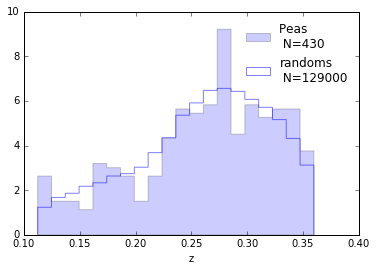

In [8]:
#plot z distributions
nd = len(peas)
nr = len(rzpea)
plt.hist(peas['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
         label='Peas \n N='+str(nd))
plt.hist(rzpea['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
         label='randoms\n N='+str(nr))
plt.xlabel('z')
plt.legend(loc='best', frameon=False)

#plt.savefig('../plots/zdist_agn_v_2mrsgalaxies_wrandoms2.pdf')

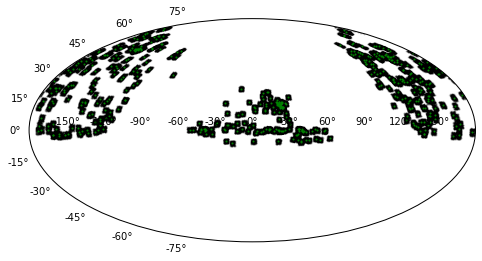

In [17]:
ra = coord.Angle(peas['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(peas['dec']*u.degree)

rar = coord.Angle(rzpea['ra']*u.degree)
rar = rar.wrap_at(180*u.degree)
decr = coord.Angle(rzpea['dec']*u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")

ax.scatter(rar.radian,decr.radian,1,color='k',alpha=.05)
ax.scatter(ra.radian, dec.radian,1,color='g',marker='o')

# blue is non-random default color used, black is randoms (k), reds r, cyan is c, green is g, points is transparent
# marker='o', '+', '*','.', 'x','square' or 's'	Square'diamond'or'd','^','v', '>', '<','pentagram' or 'p','hexagram' or 'h','none'

plt.savefig('../plots/PeaRand_ra_dec.pdf')

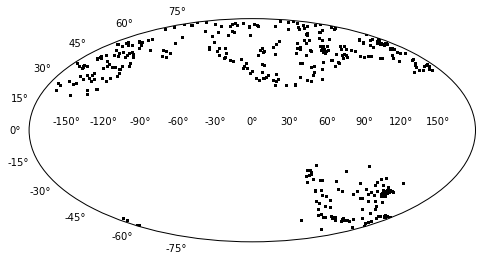

In [10]:
##Plotting galactic l & b
rar = coord.Angle(rzpea['l']*u.degree)
rar = rar.wrap_at(180*u.degree)
decr = coord.Angle(rzpea['b']*u.degree)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter(rar.radian,decr.radian,1,color='k',alpha=.2)
#ax.scatter(ra.radian, dec.radian)
# blue is non-random default color used, black is randoms (k), reds r, cyan is c, green is g, points is transparent
#plt.savefig('../plots/PeaRand_ra_dec.pdf')

## Read in LRG catalogs (from Nikhil's BOSS catalog formatted in LuminousRedGalaxies.py)

In [10]:
LRG= Table.read('../cat/LRGzcat.fits')
LRGr=Table.read('../cat/LRGRandzcat.fits')

In [18]:
#Needed for cross correlation - arrays w/ ra/dec/z/cdist
print(peas.dtype.names)
print(rzpea.dtype.names)
print(LRG.dtype.names)
print(LRGr.dtype.names)


('DR12_OBJID', 'ra', 'dec', 'z', 'cdist')
('z', 'ra', 'dec', 'l', 'b', 'cdist')
('ra', 'dec', 'z', 'cdist')
('ra', 'dec', 'z', 'cdist')


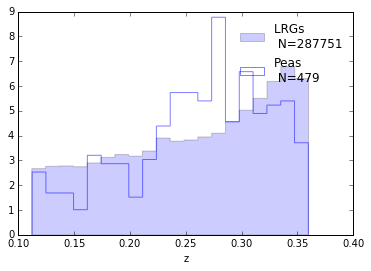

In [19]:
nd = len(LRG)
nr = len(peas)
plt.hist(LRG['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
         label='LRGs \n N='+str(nd))
plt.hist(peas['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
         label='Peas\n N='+str(nr))
plt.xlabel('z')
plt.legend(loc='best', frameon=False)


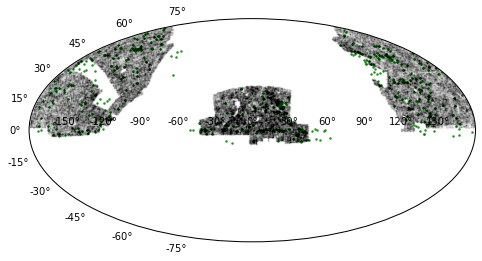

In [21]:
ra = coord.Angle(peas['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(peas['dec']*u.degree)

raLRG = coord.Angle(LRG['ra']*u.degree)
raLRG = raLRG.wrap_at(180*u.degree)
decLRG = coord.Angle(LRG['dec']*u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter(ra.radian, dec.radian,10,color='g',marker=".",alpha=.7)

ax.scatter(raLRG.radian,decLRG.radian,1,color='k',alpha=.01)
#raall = coord.Angle(peasall['ra']*u.degree)
#raall = raall.wrap_at(180*u.degree)
#decall = coord.Angle(peasall['dec']*u.degree)
#ax.scatter(raall.radian, decall.radian,10,color='r')
# blue is non-random default color used, black is randoms (k), reds r, cyan is c, green is g, points is transparent
# marker = 'd' diamond,
#plt.savefig('../plots/PeaRand_ra_dec.pdf')

# Clustering in a variety of combinations (Auto & Cross)
# 1st: Cross Correlation Peas vs. LRG

In [40]:
## Initialize bins, $\pi_{max}$
# set out to 60 Mpc length, as a function of r_p, each scale is integrated from 0 to 60 Mpc (Note Zehavi et al. used pimax = 40 mpc)
###tune rbins, choose lenght and plot several lengths vs. correlation function. (wp of 2mp, as a function of pi max) )
pimax=40
nbins = 10
bins = np.logspace(-1, np.log10(40), nbins + 1)

In [41]:
## Run a clustering cross correlation b/w the peas & LRGs w/ no jacknif errors
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#wpx=wp_d1d2(d1=peas,d2=LRG,r2=LRGr, bins=bins, pimax=pimax, r1=rzpea, estimator='L')
## with errors? these are wrong, helpix divides sky into projection of equal area pixels, bin sample 
#m is # jaclknife,try40 (NOTE 40 min to run
rp,wp_ag,wp_ag_err,Mag = w.cross_wp(d1=peas, d2=LRG, r1=rzpea, r2=LRGr, bins=bins, pimax=pimax,m=5, estimator='L')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))


2017-07-08 08:33:38
beginning jackknifes
0 0 0 72.0 -90.0 -36.86989764584402
0 0 0 72.0 -36.86989764584402 -11.536959032815485
55 27124 0 72.0 -11.536959032815485 11.536959032815492
59 29555 0 72.0 11.536959032815492 36.86989764584403
0 0 0 72.0 36.86989764584403 90.0
0 0 72.0 144.0 -90.0 -36.86989764584402
0 0 72.0 144.0 -36.86989764584402 -11.536959032815485
15 7594 72.0 144.0 -11.536959032815485 11.536959032815492
34 17222 72.0 144.0 11.536959032815492 36.86989764584403
31 15433 72.0 144.0 36.86989764584403 90.0
0 0 144.0 216.0 -90.0 -36.86989764584402
0 0 144.0 216.0 -36.86989764584402 -11.536959032815485
29 14353 144.0 216.0 -11.536959032815485 11.536959032815492
62 30933 144.0 216.0 11.536959032815492 36.86989764584403
90 44900 144.0 216.0 36.86989764584403 90.0
0 0 216.0 288.0 -90.0 -36.86989764584402
0 0 216.0 288.0 -36.86989764584402 -11.536959032815485
19 9765 216.0 288.0 -11.536959032815485 11.536959032815492
24 11269 216.0 288.0 11.536959032815492 36.86989764584403
26 13439

In [19]:
### from a auto correlation in lumionous red gal .py
##sqrt(lrgauto/peascrosslrg)=biaslrgauto/biaslrgpeas (take outside several mpc)
#LRGwp_p=np.array([ 1026.17777937,   681.95715804,   379.20917454,   188.58986124,
##         104.93445936,    68.33945071,    42.54954507,    24.3757939 ,
#          12.65178423,     5.42466491])
#lrgrp=np.array([  0.14102821,   0.25675091,   0.46743152,   0.85098909,1.54928027,   2.8205642 ,   5.13501822,   9.34863035, 17.01978177,  30.98560543])

In [47]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp,wp_ag,yerr=wp_ag_err,fmt='.',label='LRG Peas CCF')
#plt.scatter(bins[1:],wpx,color='r')
#plt.scatter(rp,LRGwp_p_noerr,color='r',label='LRG ACF')
#plt.plot(lrgrp,LRGwp_p)
##plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('LRG Pea CCF')
plt.axis([.1,100,.5,1000])

#plt.savefig('../plots/XcorrfunctLRGpeas.pdf')
##not as clustered as LRGs......

[0.1, 100, 0.5, 1000]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1104bad90> (for post_execute):


TypeError: First argument must be a path or file object reading bytes

TypeError: First argument must be a path or file object reading bytes

In [72]:
wpx

array([  1.35603643e+02,   1.05916010e+01,   1.08409143e+02,
         1.00487185e+01,   3.44492253e+01,  -6.53275307e-02,
         6.87510813e+00,   3.65607304e+00,   2.96647034e+00,
         1.52927692e+00])

In [111]:
##note from auto peas corr below....
rp

array([  0.14102821,   0.25675091,   0.46743152,   0.85098909,
         1.54928027,   2.8205642 ,   5.13501822,   9.34863035,
        17.01978177,  30.98560543])

In [62]:
p = (400**2)/((1./3)*(cosmo.comoving_volume(.36) - cosmo.comoving_volume(.112)))

In [63]:
a = (600**2)/(.9*(cosmo.comoving_volume(.1) - cosmo.comoving_volume(.01)))

In [65]:
np.sqrt(a/p)

<Quantity 5.552232385644766>

## 2nd: Auto Correlation for the Peas w/ Jackknife Errors

In [9]:
# set out to 60 Mpc length, as a function of r_p, each scale is integrated from 0 to 60 Mpc
pimax=60
nbins = 20
bins = np.logspace(-1, np.log10(40), nbins + 1)

##Compute Auto-correlation

In [13]:
# computing errors to autocorrelation points (w_p) as a function of r_p
#errors are wrong jackknife code, pieces of the sky are too larger
# m = 5, 25 jackknove samples, divides sky into that many pieces
# errors are so small because lots of empty sky, must remove patches of the sample sky
rp,wp_p,wp_p_err,cov = w.auto_wp(peas, rzpea, bins, pimax, m=7, estimator='L')

## The above line calls: projected_correlation_functions.py


# for cross correlation w.cross_wp
#rp,wp_ag,wp_ag_err,Mag = w.cross_wp(d1=agn44, d2=gal, r1=a44rand, r2=grand, bins=bins, pimax=pimax, \
#                                m=5, estimator='L')

beginning jackknifes
0 0 51.42857142857143 -90.0 -45.58469140280703
0 0 51.42857142857143 -45.58469140280703 -25.376933525152303
4 0 51.42857142857143 -25.376933525152303 -8.213210701738191
41 0 51.42857142857143 -8.213210701738191 8.213210701738186
55 0 51.42857142857143 8.213210701738186 25.3769335251523
6 0 51.42857142857143 25.3769335251523 45.58469140280702
0 0 51.42857142857143 45.58469140280702 89.99999914622636
0 51.42857142857143 102.85714285714286 -90.0 -45.58469140280703
0 51.42857142857143 102.85714285714286 -45.58469140280703 -25.376933525152303
0 51.42857142857143 102.85714285714286 -25.376933525152303 -8.213210701738191
0 51.42857142857143 102.85714285714286 -8.213210701738191 8.213210701738186
0 51.42857142857143 102.85714285714286 8.213210701738186 25.3769335251523
0 51.42857142857143 102.85714285714286 25.3769335251523 45.58469140280702
0 51.42857142857143 102.85714285714286 45.58469140280702 89.99999914622636
0 102.85714285714286 154.28571428571428 -90.0 -45.58469140

In [21]:
rp

array([  0.11746414,   0.15849235,   0.21385101,   0.2885455 ,
         0.3893295 ,   0.52531561,   0.70879935,   0.9563708 ,
         1.29041472,   1.74113445,   2.34928285,   3.16984705,
         4.27702026,   5.77091007,   7.78658997,  10.50631229,
        14.17598697,  19.12741606,  25.80829442,  34.82268898])

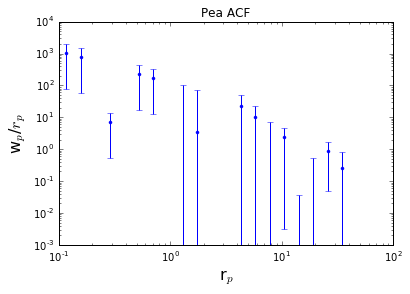

In [12]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
#plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/$r_{p}$',fontsize=16)
plt.title('Pea ACF')

#plt.savefig('../plots/corrfunctSFpeas.pdf')

In [61]:
wp_p

array([  70.        ,  112.        ,  120.        ,   91.99298851,
         97.00822885,   88.56083675,  336.53920382,  197.76710987,
        180.25799518,  195.71429682])

## Fitting AutoCorrelations with a powerlaw to determine the bias

In [127]:
y(1,1,2)

3.1415926535897927

In [16]:
#Fit with a powerlaw to determine bias (using the autocorrelation of the LRGs)
# Gamma is a function from cosmology package (gamma is slope and r0 is amplitude)
##https://www.hindawi.com/journals/aa/2012/853701/
from scipy.special import gamma
def A(g):
    return gamma(1/2)*gamma((g-1)/2)/gamma(g/2) 
#y is model powerlaw given rp & 2 parameters of fit
def y(r,r0,g):
    return A(g)*(r0**g)*(r**(1.-g))


In [17]:
## Now fit an actual curve to the data rp2 & wp two halo data
#sigerr=wp_p_err
##p0 is guesses

from scipy.optimize import curve_fit
plawfit=curve_fit(y,rp_LRGboot,wp_p_LRGboot,p0=[2,2])
r0=plawfit[0][0]
gam=plawfit[0][1]

# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gam)*2*g)
sig_agn = np.sqrt(J(gam)*(r0/8)**gam)
sig_dm = (0.8)
bias = sig_agn/sig_dm

NameError: name 'rp2' is not defined

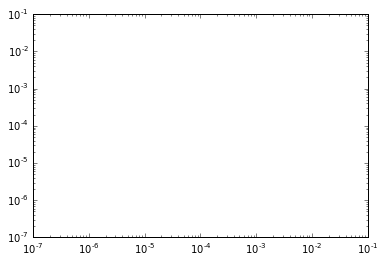

In [18]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
yf_arr=[]
for r in rp2:
    yf_arr.append(y(r,r0,gam))
plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='k')
plt.plot(rp2,yf_arr,color='k')

In [123]:
curve_fit(y,rp[2:],wp_p[2:])

/Users/ccardamone/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 1.,  1.]), array([[ inf,  inf],
        [ inf,  inf]]))

## 3rd: LRG AutoCorrelation

In [23]:
rp

array([  0.11746414,   0.15849235,   0.21385101,   0.2885455 ,
         0.3893295 ,   0.52531561,   0.70879935,   0.9563708 ,
         1.29041472,   1.74113445,   2.34928285,   3.16984705,
         4.27702026,   5.77091007,   7.78658997,  10.50631229,
        14.17598697,  19.12741606,  25.80829442,  34.82268898])

In [22]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp,LRGwp_err,Mag = w.cross_wp(d1=peas, d2=LRG, r1=rzpea, r2=LRGr, bins=bins, pimax=pimax,m=5, estimator='L')
LRGwp_p_noerr = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
LRGrp,LRGwp_p,LRGwp_err,cov = w.auto_wp(LRG, LRGr, bins, pimax, m=5, estimator='L')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-07-07 13:15:30
2017-07-07 14:01:41


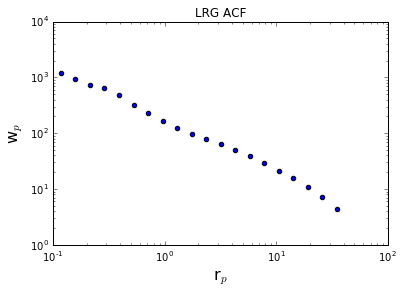

In [25]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.scatter(rp,LRGwp_p_noerr)
#plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('LRG ACF')

plt.savefig('../plots/corrfunctSFpeas.pdf')

In [30]:
lrgarr=LRGwp_p_noerr
print(lrgarr)
t=np.array[ 1207.59797145   926.71826561   740.51311535   649.49317644   475.78208821,   325.88695705   226.41574675   167.75232351   121.72320789    95.66270522
    78.11677523    62.94309205    50.05565821    38.4062902     29.58508109,     21.4869693     15.72685764    10.93836918     7.17687202     4.43936256]

SyntaxError: invalid syntax (<ipython-input-30-fa77d49cda42>, line 3)

In [ ]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.scatter(rp,LRGwp_p)
#plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/$r_{p}$',fontsize=16)
plt.title('LRG ACF')

plt.savefig('../plots/corrfunctSFpeas.pdf')

## Testing Selection of Pimax

In [11]:
# set out to 60 Mpc length, as a function of r_p, each scale is integrated from 0 to 60 Mpc
nbins = 10
bins = np.logspace(-1, np.log10(40), nbins + 1)
bins = np.array([1,3,6,8,10,15,20,30,40,50,60])

In [12]:
pimax=20

## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
rp_xc_pi20,wp_xc_pi20,wp_xc_err_pi20,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-22 11:56:49
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-08-22 12:12:10


In [13]:
pimax=40

## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
rp_xc_pi40,wp_xc_pi40,wp_xc_err_pi40,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-22 12:13:36
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-08-22 12:28:51


pimax=40
rp_xc_pi40,wp_xc_pi40,wp_xc_err_pi40,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')


In [14]:
pimax=60

## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
rp_xc_pi60,wp_xc_pi60,wp_xc_err_pi60,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-22 12:36:25
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-08-22 12:52:58


In [15]:
pimax=80

## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
rp_xc_pi80,wp_xc_pi80,wp_xc_err_pi80,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-22 13:05:58
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-08-22 13:22:50


In [16]:
pimax=100

## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
rp_xc_pi100,wp_xc_pi100,wp_xc_err_pi100,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-22 13:40:08
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-08-22 13:56:00


In [21]:
## Run a clustering CROSS CORRELATION b/w the peas & LRGs w/ bootstrap
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
## with errors? bootstrapped
pimax=120
rp_xc_pi120,wp_xc_pi120,wp_xc_err_pi120,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')
pimax=140
rp_xc_pi140,wp_xc_pi140,wp_xc_err_pi140,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')
pimax=50
rp_xc_pi50,wp_xc_pi50,wp_xc_err_pi50,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')
pimax=70
rp_xc_pi70,wp_xc_pi70,wp_xc_err_pi70,cov_xc_Pboot,wp_arr_xc_Pboot = w.cross_wp(d1=peas,d2=LRG, r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')


print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-22 14:55:31
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100


In [18]:
np.save('output/rp_xc_pi20.npy',rp_xc_pi20)
np.save('output/wp_xc_pi20.npy',wp_xc_pi20)
np.save('output/wp_xc_err_pi20.npy',wp_xc_err_pi20)
np.save('output/rp_xc_pi40.npy',rp_xc_pi40)
np.save('output/wp_xc_pi40.npy',wp_xc_pi40)
np.save('output/wp_xc_err_pi40.npy',wp_xc_err_pi40)
np.save('output/rp_xc_pi60.npy',rp_xc_pi60)
np.save('output/wp_xc_pi60.npy',wp_xc_pi60)
np.save('output/wp_xc_err_pi60.npy',wp_xc_err_pi60)
np.save('output/rp_xc_pi80.npy',rp_xc_pi80)
np.save('output/wp_xc_pi80.npy',wp_xc_pi80)
np.save('output/wp_xc_err_pi80.npy',wp_xc_err_pi80)
np.save('output/rp_xc_pi100.npy',rp_xc_pi100)
np.save('output/wp_xc_pi100.npy',wp_xc_pi100)
np.save('output/wp_xc_err_pi100.npy',wp_xc_err_pi100)

In [22]:
np.save('output/rp_xc_pi120.npy',rp_xc_pi120)
np.save('output/wp_xc_pi120.npy',wp_xc_pi120)
np.save('output/wp_xc_err_pi120.npy',wp_xc_err_pi120)

np.save('output/rp_xc_pi140.npy',rp_xc_pi140)
np.save('output/wp_xc_pi140.npy',wp_xc_pi140)
np.save('output/wp_xc_err_pi140.npy',wp_xc_err_pi140)

np.save('output/rp_xc_pi50.npy',rp_xc_pi50)
np.save('output/wp_xc_pi50.npy',wp_xc_pi50)
np.save('output/wp_xc_err_pi50.npy',wp_xc_err_pi50)

np.save('output/rp_xc_pi70.npy',rp_xc_pi70)
np.save('output/wp_xc_pi70.npy',wp_xc_pi70)
np.save('output/wp_xc_err_pi70.npy',wp_xc_err_pi70)

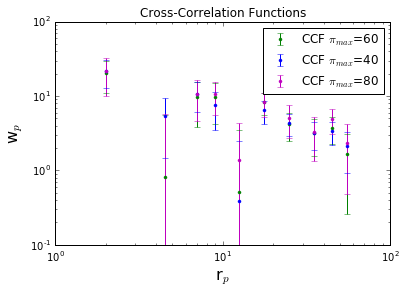

In [27]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
#plt.errorbar(rp_xc_Pjack,wp_xc_Pjack,yerr=wp_xc_err_Pjack,fmt='.',color='b',label='Peas LRG CCF jackerr')
plt.errorbar(rp_xc_pi60,wp_xc_pi60,yerr=wp_xc_err_pi60,fmt='.',color='g',label='CCF $\pi_{max}$=60')
plt.errorbar(rp_xc_pi40,wp_xc_pi40,yerr=wp_xc_err_pi40,fmt='.',color='b',label='CCF $\pi_{max}$=40')
plt.errorbar(rp_xc_pi80,wp_xc_pi80,yerr=wp_xc_err_pi80,fmt='.',color='m',label='CCF $\pi_{max}$=80')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions')
